1)	Please take care of missing data present in the “Data.csv” file using the Python module 

    “sklearn.impute” and its methods, also collect all the data that has “Salary” less than “70,000”.


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
data=pd.read_csv("Data.csv")
columnsmissingvalue=data.columns[data.isnull().any()]
columnsmissingvalue

Index(['Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'EmploymentStatus', 'Department', 'Salaries', 'age', 'Race'],
      dtype='object')

In [2]:
numeric=data.select_dtypes(include=[float,int]).columns
non_numeric=data.select_dtypes(include=[object]).columns

In [3]:
import numpy as np
num_imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
num_imputer.fit(data[numeric])
num_column_imputed=num_imputer.transform(data[numeric])

In [4]:
string_imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
string_column_imputed=string_imputer.fit_transform(data[non_numeric])

In [5]:
filtered_data=data[data["Salaries"]<70000]

In [6]:
filtered_data

,Position,State,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,Accountant I,NaN,F,Married,US Citizen,Active,Admin Offices,674.28,NaN,Black or African American
1,Accountant I,MA,M,Divorced,US Citizen,Active,Admin Offices,674.28,50.0,Black or African American
2,Accountant I,MA,M,Single,NaN,Active,Admin Offices,674.28,43.0,White
3,Administrative Assistant,MA,F,NaN,US Citizen,Terminated for Cause,Admin Offices,47822.00,44.0,NaN
5,Administrative Assistant,MA,F,Married,US Citizen,Voluntarily Terminated,Admin Offices,32406.02,40.0,Asian
...,...,...,...,...,...,...,...,...,...,...
304,Principal Data Architect,MA,F,Single,NaN,Voluntarily Terminated,IT/IS,24828.70,NaN,White
306,Sr. Network Engineer,MA,M,Married,US Citizen,Leave of Absence,IT/IS,27603.00,34.0,White
307,NaN,MA,M,Married,US Citizen,Future Start,IT/IS,27587.46,24.0,Asian
308,Sr. Network Engineer,CT,M,NaN,US Citizen,Active,IT/IS,12126.53,31.0,White


2)	Subtracting dates: 
Python date objects let us treat calendar dates as something like numbers: we can compare them, sort them, add, and even subtract them. Do the math with dates in a way that would be a pain to do by hand. The 2007 Florida hurricane season was one of the busiest on record, with 8 hurricanes in one year. The first one hit on May 9th, 2007, and the last one hit on December 13th, 2007. How many days elapsed between the first and last hurricane in 2007?
	
    Instructions:
	Import date from datetime.
	Create a date object for May 9th, 2007, and assign it to the start variable.
	Create a date object for December 13th, 2007, and assign it to the end variable.
	Subtract start from end, to print the number of days in the resulting timedelta object.


In [7]:
from datetime import date,datetime,timedelta

In [8]:
start=date(2007,5,9)
end=date(2007,12,13)
days_diff=end-start

In [9]:
print(days_diff.days)

218


3)	Representing dates in different ways

Date objects in Python have a great number of ways they can be printed out as strings. In some cases, you want to know the date in a clear, language-agnostic format. In other cases, you want something which can fit into a paragraph and flow naturally.

Print out the same date, August 26, 1992 (the day that Hurricane Andrew made landfall in Florida), in a number of different ways, by using the “ .strftime() ” method. Store it in a variable called “Andrew”. 

Instructions: 	
Print it in the format 'YYYY-MM', 'YYYY-DDD', and 'MONTH (YYYY)'


In [10]:
Andrew=date(1992,8,26)
print(Andrew.strftime("%Y-%m"))

1992-08


In [11]:
print(Andrew.strftime("%Y-%j"))

1992-239


In [12]:
print(Andrew.strftime("%B (%Y)"))

August (1992)


4)For the dataset “Indian_cities”, 
   
    a)	Find out the top 10 states in female-male sex ratio.
    b)	Find out the top 10 cities in the total number of graduates.
    c)	Find out the top 10 cities and their locations in respect of total ‘effective_literacy_rate’.



In [13]:
data=pd.read_csv("Indian_cities.csv")
grouped_data=data.groupby("state_name")["sex_ratio"].mean().reset_index()
sorted_data=grouped_data.sort_values("sex_ratio",ascending=False)
topstates=sorted_data["state_name"].head(10)
print(topstates.to_string(index=False))

        KERALA
      MANIPUR 
     MEGHALAYA
    PUDUCHERRY
       MIZORAM
       TRIPURA
    TAMIL NADU
ANDHRA PRADESH
     KARNATAKA
         ASSAM


In [14]:
sorted_data

,state_name,sex_ratio
12,KERALA,1066.714286
15,MANIPUR,1055.000000
16,MEGHALAYA,1042.000000
21,PUDUCHERRY,1035.000000
17,MIZORAM,1029.000000
25,TRIPURA,1002.000000
24,TAMIL NADU,1001.031250
1,ANDHRA PRADESH,999.404762
11,KARNATAKA,987.115385
2,ASSAM,950.750000


In [15]:
data2=data.sort_values("total_graduates",ascending=False)
topcities=data2["name_of_city"].head(10)
print(topcities.to_string(index=False))

            Delhi 
   Greater Mumbai 
         Bengaluru
Greater Hyderabad 
          Chennai 
          Kolkata 
        Ahmadabad 
             Pune 
          Lucknow 
           Jaipur 


In [16]:
data3=data.sort_values("effective_literacy_rate_total",ascending=False)
topcities2=data3[["name_of_city","state_name","effective_literacy_rate_total"]].head(10)
print(topcities2.to_string(index=False))


     name_of_city       state_name  effective_literacy_rate_total
          Aizawl           MIZORAM                          98.80
           Kochi            KERALA                          97.49
        Thrissur            KERALA                          97.24
       Kozhikode            KERALA                          96.80
       Alappuzha            KERALA                          96.56
        Khardaha       WEST BENGAL                          95.50
       Nagercoil        TAMIL NADU                          95.35
         Alandur        TAMIL NADU                          95.15
North Barrackpur       WEST BENGAL                          94.78
          Shimla  HIMACHAL PRADESH                          94.67


5)For the data set “Indian_cities”
    
    a)	Construct a histogram on ‘literates_total’ and comment on the inferences.
    b)	Construct a scatter plot between male graduates and female graduates.


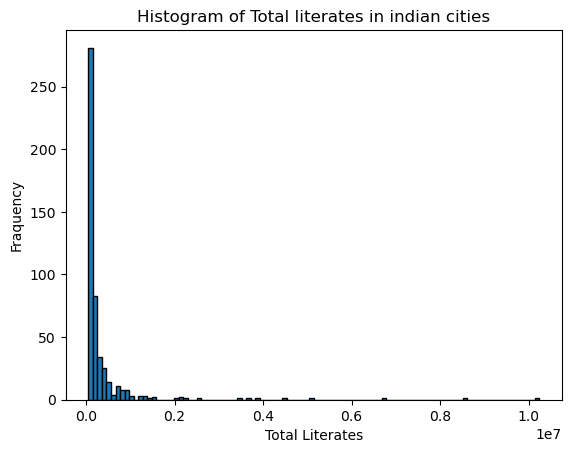

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("Indian_cities.csv")
plt.hist(df['literates_total'],bins=100,edgecolor='black')
plt.xlabel("Total Literates")
plt.ylabel("Fraquency")
plt.title("Histogram of Total literates in indian cities")
plt.show()

As the distribution of values is positively skewed - that means most of the cities have very low literates....and some unusual cities with very high literates that can be the hub of education. Majority of cities have very low literate popolation and forms acluster towards left

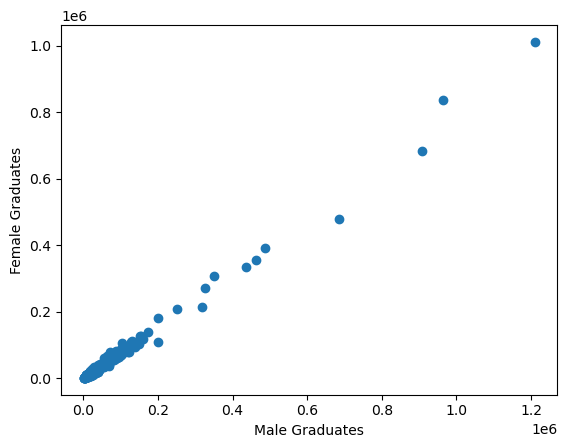

In [19]:
plt.scatter(df['male_graduates'],df['female_graduates'])
plt.xlabel("Male Graduates")
plt.ylabel("Female Graduates")
plt.show()

the datapoints in the above scatter plot represents strong positive correlation..each datapoint represents a city....the outcome replresents that the number of male graduates is directly proportional to the number of female graduates..that means there is a positive linear relationship between male and female graduates implies that both genders are similarly affected by educational opportunities 

6)For the data set “Indian_cities”
    
    a)	Construct Boxplot on the total effective literacy rate and draw inferences.
    b)	Find out the number of null values in each column of the dataset and delete them.


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='effective_literacy_rate_total'>

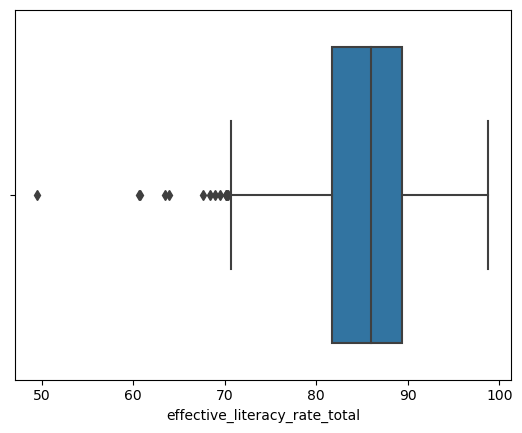

In [21]:
df=pd.read_csv("Indian_cities.csv")
import seaborn as sns
sns.boxplot(df.effective_literacy_rate_total)

In [23]:

Q1 = np.percentile(df.effective_literacy_rate_total, 25)
Q3 = np.percentile(df.effective_literacy_rate_total, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = [x for x in df.effective_literacy_rate_total if x < lower_bound or x > upper_bound]
num_outliers = len(outliers)



In [25]:
# Calculate the percentage of outliers
percentage_outliers = (num_outliers / len(df.effective_literacy_rate_total)) * 100

print("Number of outliers:", num_outliers)
print("Percentage of outliers:", percentage_outliers, "%")


Number of outliers: 13
Percentage of outliers: 2.636916835699797 %


from the above outcome we conlude that our data have 13 outliers or 2.63 percentage of outliers which is neglectable...there are some cities in the dataset with significantly higher or lower effective literacy rates compared to the majority of cities. These cities can be considered as exceptional cases .

In [27]:
# Find the number of null values in each column
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)
df = df.dropna()
#resetting index
df.reset_index(drop=True, inplace=True)


Number of null values in each column:
name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64
